In [ ]:
# Data Source:  https://www.kaggle.com/smid80/canadian-federal-election-results-timeseries
#               https://open.canada.ca/data/en/dataset/737be5ea-27cf-48a3-91d6-e835f11834b0  - 2015

# Folder: canadian-federal-election-results-timeseries

<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Canadian Federal Election Results</p><br><br>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
from geopandas import GeoDataFrame
from descartes import PolygonPatch
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz


C:\Users\djord\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
!ls

Canadian Federal Election Results (Timeseries) - Kaggle.url
DSE200x Final Project.ipynb
Federal Election Districts 2015.json
Icon_
Planck Satellite Data Simulation using pandas.ipynb
Protein Data Bank Notebooks
Twitter_data.csv
canadian-federal-election-results-timeseries
federal_electoral_districts_boundaries_2015_shp_en
image
image.pdf
planck_70GHz_map.hdf5


In [3]:
can_data = pd.read_csv('./canadian-federal-election-results-timeseries/candidates.csv')
can_data.shape

(11779, 18)

In [4]:
can_data.tail()

,election_id,event_number,electoral_district_number_numéro_de_circonscription,ballot_sequence_number,candidate_candidat,candidate_first_name_prénom_du_candidat,candidate_middle_name_second_prénom_du_candidat,candidate_family_name_nom_de_famille_du_candidat,candidate_gender_code,candidate_occupation_english_anglais,profession_du_candidat_français_french,incumbent_indicator,elected_indicator,candidate_residence_résidence_du_candidat,candidate_province_english_anglais,province_du_candidat_français_french,party_abbreviation_english_anglais,abréviation_de_parti_français_french
11774,GE.42.2015,4200,47014,4,Cathay Wagantall,Cathay,Cathay,Wagantall,NaN,Business Owner,Propriétaire d'entreprise,N,NaN,Esterhazy,Saskatchewan,Saskatchewan,Conservative,Conservateur
11775,GE.42.2015,4200,60001,1,Melissa Atkinson,Melissa,Melissa,Atkinson,NaN,Lawyer,Avocate,N,NaN,Whitehorse,Yukon,Yukon,NDP,NPD
11776,GE.42.2015,4200,60001,2,Larry Bagnell,Larry,Larry,Bagnell,NaN,Retired,Retraité,N,NaN,Whitehorse,Yukon,Yukon,Liberal,Libéral
11777,GE.42.2015,4200,60001,3,Frank de Jong,Frank,Frank,de Jong,NaN,Teacher,Enseignant,N,NaN,Faro,Yukon,Yukon,Green,Vert
11778,GE.42.2015,4200,60001,4,Ryan Leef,Ryan,Ryan,Leef,NaN,Parliamentarian,Parlementaire,Y,NaN,Whitehorse,Yukon,Yukon,Conservative,Conservateur


Clean data. Remove rows with Nan for elected Indicator

In [5]:
can_data.dropna(inplace = True)

can_data.shape

(3446, 18)

In [6]:
can_data.head()

,election_id,event_number,electoral_district_number_numéro_de_circonscription,ballot_sequence_number,candidate_candidat,candidate_first_name_prénom_du_candidat,candidate_middle_name_second_prénom_du_candidat,candidate_family_name_nom_de_famille_du_candidat,candidate_gender_code,candidate_occupation_english_anglais,profession_du_candidat_français_french,incumbent_indicator,elected_indicator,candidate_residence_résidence_du_candidat,candidate_province_english_anglais,province_du_candidat_français_french,party_abbreviation_english_anglais,abréviation_de_parti_français_french
0,GE.36.1997,3600,ED10-001,1,Randy Dawe,Randy,Randy,Dawe,M,Businessperson,Personne d'affaires,N,N,Clarke's Beach,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
1,GE.36.1997,3600,ED10-001,2,Fraser March,Fraser,Fraser,March,M,Labour Relations Consultant,Consultant en relations de travail,N,N,Blaketown,Newfoundland and Labrador,Terre-Neuve-et-Labrador,NDP,NPD
2,GE.36.1997,3600,ED10-001,3,Fred J. Mifflin,Fred,Fred,Mifflin,M,Politician,Politicien,Y,Y,Ottawa,Ontario,Ontario,Liberal,Libéral
3,GE.36.1997,3600,ED10-001,4,L. Christopher Randell,L.,L.,Randell,M,Medical Doctor,Médecin,N,N,Bonavista,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Nil,Nil
4,GE.36.1997,3600,ED10-002,1,Bill Matthews,Bill,Bill,Matthews,M,Teacher,Enseignant,N,Y,Mount Pearl,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC


## Let's explore the geography of the election

In [55]:
#Select winning districts in 1997

winning_districts_1997 = can_data[can_data['elected_indicator'].str.contains('Y', na=False) &
                                 can_data['election_id'].str.contains(str('1997'), na=False)]
winning_districts_1997

,election_id,event_number,electoral_district_number_numéro_de_circonscription,ballot_sequence_number,candidate_candidat,candidate_first_name_prénom_du_candidat,candidate_middle_name_second_prénom_du_candidat,candidate_family_name_nom_de_famille_du_candidat,candidate_gender_code,candidate_occupation_english_anglais,profession_du_candidat_français_french,incumbent_indicator,elected_indicator,candidate_residence_résidence_du_candidat,candidate_province_english_anglais,province_du_candidat_français_french,party_abbreviation_english_anglais,abréviation_de_parti_français_french
2,GE.36.1997,3600,ED10-001,3,Fred J. Mifflin,Fred,Fred,Mifflin,M,Politician,Politicien,Y,Y,Ottawa,Ontario,Ontario,Liberal,Libéral
4,GE.36.1997,3600,ED10-002,1,Bill Matthews,Bill,Bill,Matthews,M,Teacher,Enseignant,N,Y,Mount Pearl,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
7,GE.36.1997,3600,ED10-003,1,George Baker,George,George,Baker,M,Politician,Politicien,Y,Y,Gander,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Liberal,Libéral
11,GE.36.1997,3600,ED10-004,2,Gerry Byrne,Gerry,Gerry,Byrne,M,Politician,Politicien,Y,Y,Corner Brook,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Liberal,Libéral
16,GE.36.1997,3600,ED10-005,3,Lawrence David O'Brien,Lawrence,Lawrence,O'Brien,M,Politician,Politicien,Y,Y,Happy Valley-Goose Bay,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Liberal,Libéral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,GE.36.1997,3600,ED59-033,3,Jim Gouk,Jim,Jim,Gouk,M,Member of Parliament,Député,Y,Y,Castlegar,British Columbia,Colombie-Britannique,Reform,Réforme
1655,GE.36.1997,3600,ED59-034,5,John Reynolds,John,John,Reynolds,M,Businessman,Homme d'affaires,N,Y,Lions Bay,British Columbia,Colombie-Britannique,Reform,Réforme
1661,GE.36.1997,3600,ED60-001,5,Louise Frances Hardy,Louise,Louise,Hardy,F,Social Worker,Travailleuse sociale,N,Y,Whitehorse,Yukon,Yukon,NDP,NPD
1664,GE.36.1997,3600,ED61-001,2,Nancy Karetak-Lindell,Nancy,Nancy,Karetak-Lindell,F,Controller,Contrôleuse,N,Y,Arviat,Northwest Territories,Territoires du Nord-Ouest,Liberal,Libéral


In [56]:
plot_data_1997 = winning_districts_1997[['electoral_district_number_numéro_de_circonscription',
                                         'party_abbreviation_english_anglais']]
plot_data_1997.head()

,electoral_district_number_numéro_de_circonscription,party_abbreviation_english_anglais
2,ED10-001,Liberal
4,ED10-002,PC
7,ED10-003,Liberal
11,ED10-004,Liberal
16,ED10-005,Liberal


In [57]:
#create new formatted column with condensed FedID

plot_data_1997['electoral_district_number_numéro_de_circonscription'] = plot_data_1997.electoral_district_number_numéro_de_circonscription.str.replace('ED','')
plot_data_1997['electoral_district_number_numéro_de_circonscription'] = plot_data_1997.electoral_district_number_numéro_de_circonscription.str.replace('-','')
plot_data_1997.head()

C:\Users\djord\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\djord\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,electoral_district_number_numéro_de_circonscription,party_abbreviation_english_anglais
2,10001,Liberal
4,10002,PC
7,10003,Liberal
11,10004,Liberal
16,10005,Liberal


In [61]:
plot_data_1997 = plot_data_1997.rename(columns = {'electoral_district_number_numéro_de_circonscription' : 'FED_NUM'})
plot_data_1997

,FED_NUM,party_abbreviation_english_anglais
2,10001,Liberal
4,10002,PC
7,10003,Liberal
11,10004,Liberal
16,10005,Liberal
...,...,...
1645,59033,Reform
1655,59034,Reform
1661,60001,NDP
1664,61001,Liberal


In [80]:
plot_data_1997.FED_NUM.astype(int)

2       10001
4       10002
7       10003
11      10004
16      10005
        ...  
1645    59033
1655    59034
1661    60001
1664    61001
1667    61002
Name: FED_NUM, Length: 290, dtype: int32

In [82]:
type(plot_data_1997.FED_NUM)

pandas.core.series.Series

In [83]:
type(plot_data_1997)

pandas.core.frame.DataFrame

In [84]:
districts = gpd.read_file('./federal_electoral_districts_boundaries_2015_shp_en/FED_CA_2_2_ENG.shp')
districts.head()

,FED_NUM,NID,FEDNUM,ENNAME,FRNAME,PROVCODE,CREADT,REVDT,REPORDER,DECPOPCNT,QUIPOPCNT,ENLEGALDSC,FRLEGALDSC,geometry
0,35029,{30F68311-B8D1-4049-9DA1-88F80222930F},35029,Etobicoke North,Etobicoke-Nord,ON,20131005,None,2013,117601,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((7201954.777 935407.037, 7202067.746 ..."
1,35032,{39AFA153-47AC-4203-87DE-B7A71DF234E9},35032,Guelph,Guelph,ON,20131005,None,2013,121688,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((7151948.911 899971.331, 7151447.129 ..."
2,48017,{C3BC533E-6642-4C06-9291-10C0907A24A6},48017,Edmonton Mill Woods,Edmonton Mill Woods,AB,20131005,None,2013,106103,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((4811379.686 2157147.634, 4811380.094..."
3,48018,{C5BCB32E-57F6-4448-A533-33D114D02386},48018,Edmonton Riverbend,Edmonton Riverbend,AB,20131005,None,2013,106302,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((4801564.891 2159173.746, 4801137.980..."
4,48021,{BBFBC678-2943-48FD-BC75-A259C0060A06},48021,Edmonton--Wetaskiwin,Edmonton--Wetaskiwin,AB,20131005,None,2013,110644,0,http://www.elections.ca/res/cir/maps2/mapprov....,http://www.elections.ca/res/cir/maps2/mapprov....,"POLYGON ((4694436.409 2130675.640, 4694437.989..."


In [85]:
districts.FED_NUM.astype(int)

0      35029
1      35032
2      48017
3      48018
4      48021
       ...  
342    24057
343    24058
344    24059
345    24060
346    24061
Name: FED_NUM, Length: 347, dtype: int32

In [86]:
type(districts.FED_NUM)

pandas.core.series.Series

In [87]:
type(districts)

geopandas.geodataframe.GeoDataFrame

Dataframe dataseries now match label and type. Attempt to merge data with geodata.

In [88]:
districts = districts.merge(plot_data_1997, on = 'FED_NUM')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

Unable to merge geoframe due to mismatch in FED_NUM, this is due to re-assignment of districts from 1997/2000 to 2015. This approash will not be able to be used.

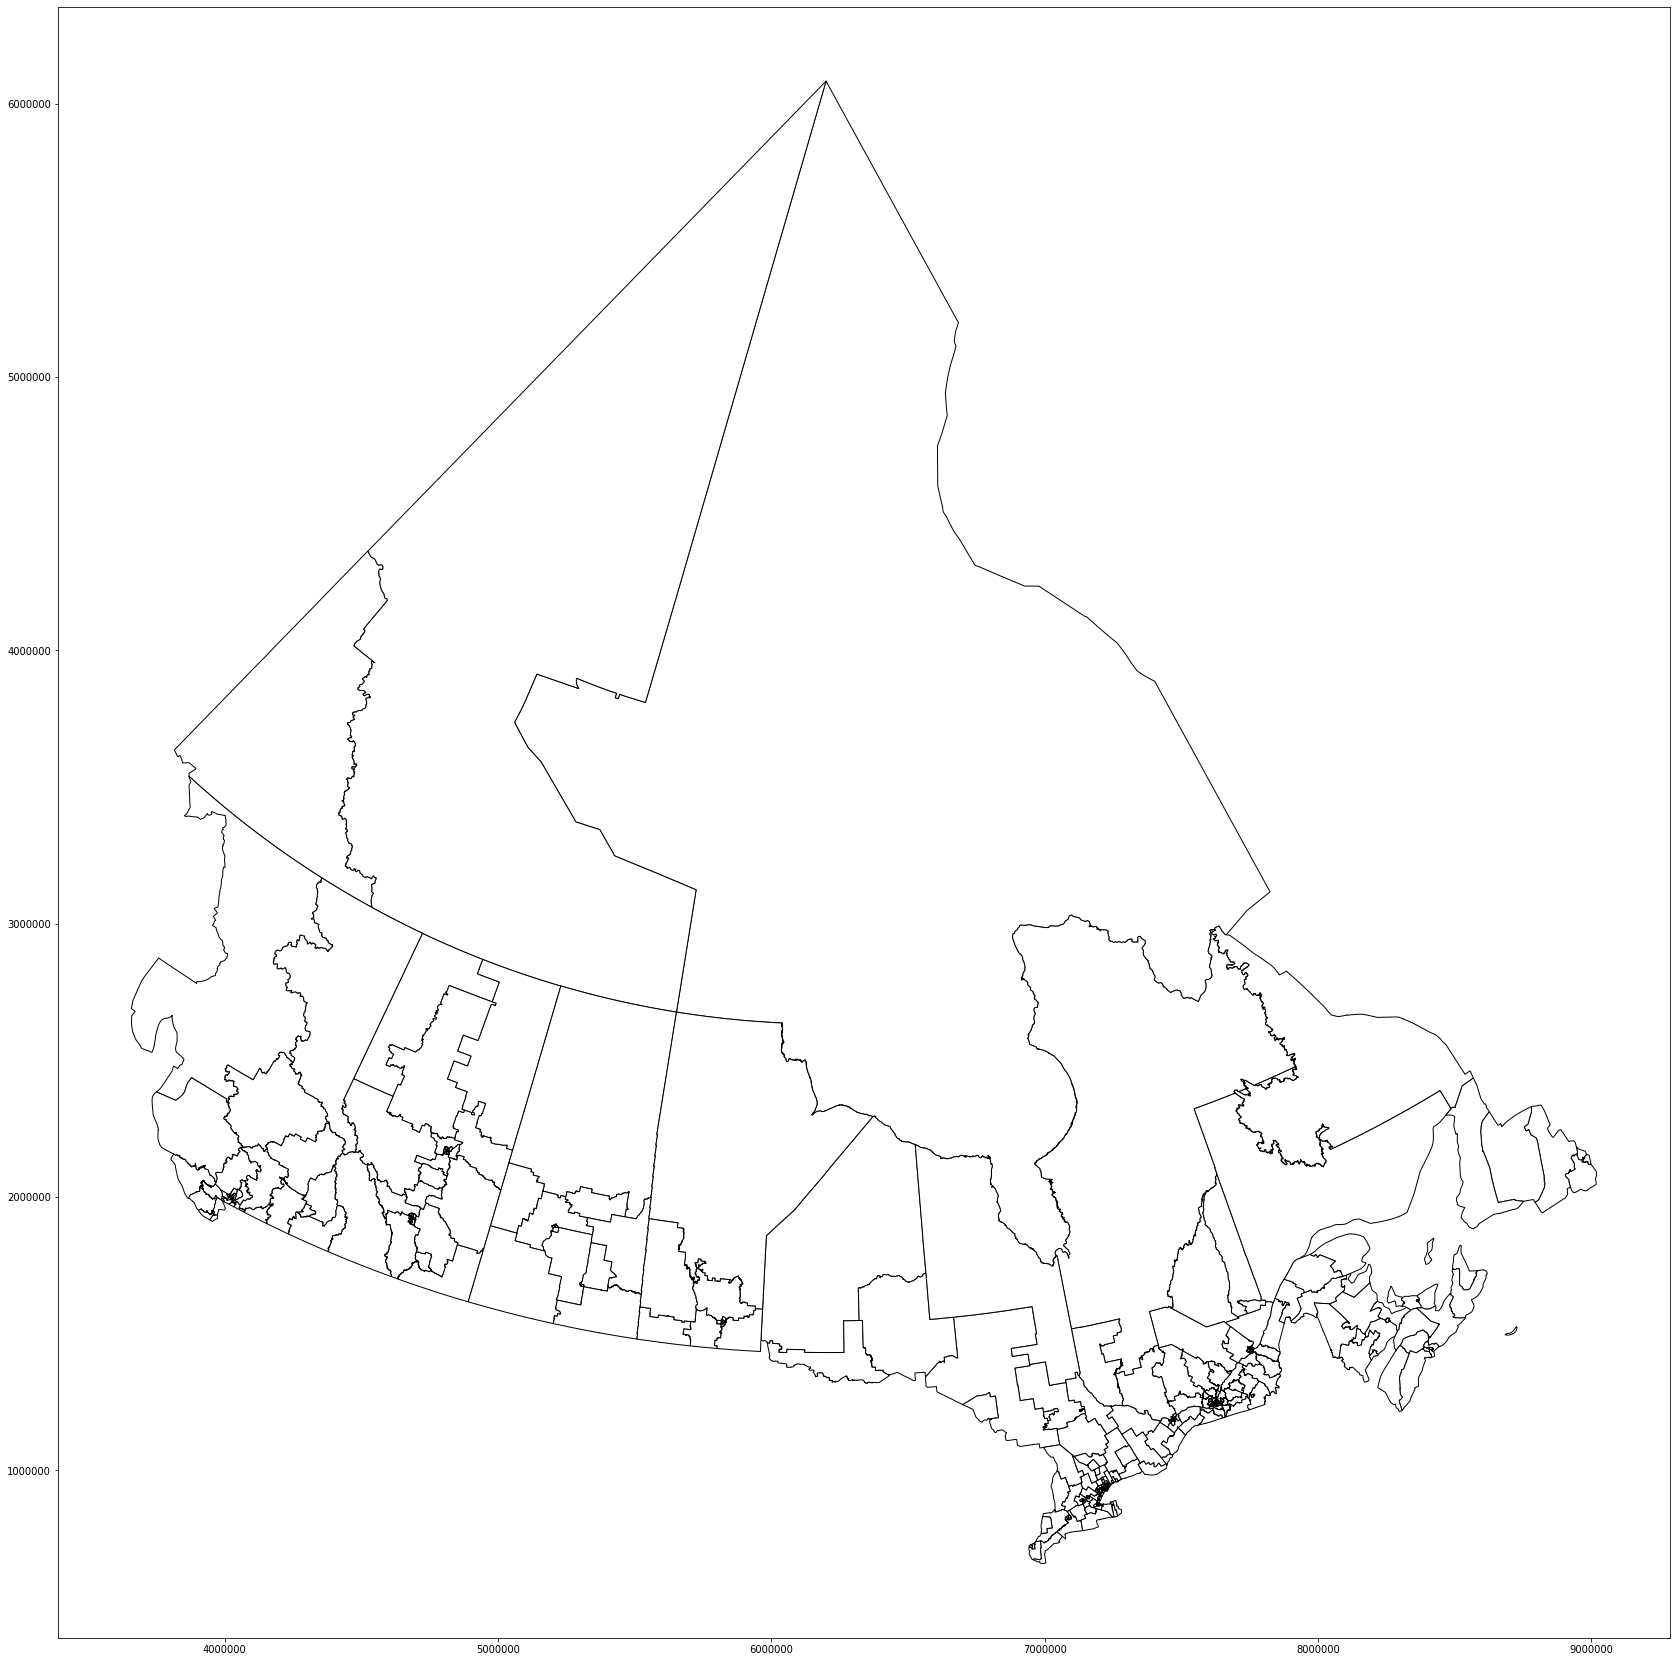

In [79]:
type(districts['geometry'])
districts.plot(figsize = (30, 30), facecolor = 'w', edgecolor = 'k')

## Let's explore impact of candidate occupation

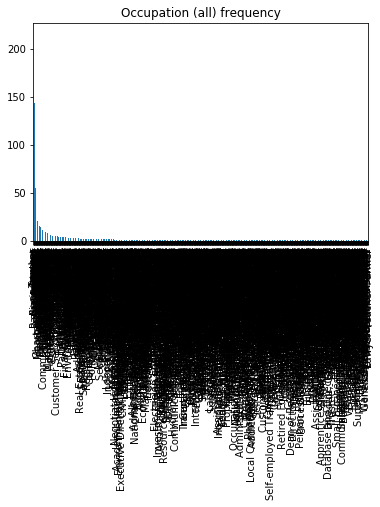

In [92]:
can_data['candidate_occupation_english_anglais'].value_counts().plot(kind = 'bar', title = 'Occupation (all) frequency')

Many occupations, long tail of data, try filtering to win/lose and create wordclouds.

In [93]:
electedFilter = "Y"
notelectedFilter = "N"

electedMask = can_data['elected_indicator'].str.contains(electedFilter, na=False)
notelectedMask = can_data['elected_indicator'].str.contains(notelectedFilter, na=False)

can_data_win = can_data[electedMask]
can_data_lose = can_data[notelectedMask]

can_data_win.head()


,election_id,event_number,electoral_district_number_numéro_de_circonscription,ballot_sequence_number,candidate_candidat,candidate_first_name_prénom_du_candidat,candidate_middle_name_second_prénom_du_candidat,candidate_family_name_nom_de_famille_du_candidat,candidate_gender_code,candidate_occupation_english_anglais,profession_du_candidat_français_french,incumbent_indicator,elected_indicator,candidate_residence_résidence_du_candidat,candidate_province_english_anglais,province_du_candidat_français_french,party_abbreviation_english_anglais,abréviation_de_parti_français_french
2,GE.36.1997,3600,ED10-001,3,Fred J. Mifflin,Fred,Fred,Mifflin,M,Politician,Politicien,Y,Y,Ottawa,Ontario,Ontario,Liberal,Libéral
4,GE.36.1997,3600,ED10-002,1,Bill Matthews,Bill,Bill,Matthews,M,Teacher,Enseignant,N,Y,Mount Pearl,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
7,GE.36.1997,3600,ED10-003,1,George Baker,George,George,Baker,M,Politician,Politicien,Y,Y,Gander,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Liberal,Libéral
11,GE.36.1997,3600,ED10-004,2,Gerry Byrne,Gerry,Gerry,Byrne,M,Politician,Politicien,Y,Y,Corner Brook,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Liberal,Libéral
16,GE.36.1997,3600,ED10-005,3,Lawrence David O'Brien,Lawrence,Lawrence,O'Brien,M,Politician,Politicien,Y,Y,Happy Valley-Goose Bay,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Liberal,Libéral


In [94]:
def build_bag_of_words(classifier, dataset):

    occ_dict = {}

    for occ in dataset[classifier]:
        if occ not in occ_dict.keys():
            occ_dict[occ] = 1
        else:
            occ_dict[occ] += 1
        
    return (occ_dict)

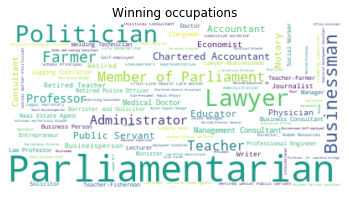

In [95]:
win_occ = build_bag_of_words("candidate_occupation_english_anglais", can_data_win)

wordcloud = WordCloud(background_color = 'white', scale = 1, max_font_size = 100, max_words = 100).generate_from_frequencies(win_occ)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Winning occupations')
plt.axis('off')
plt.show()

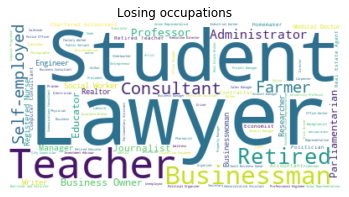

In [96]:
lose_occ = build_bag_of_words("candidate_occupation_english_anglais", can_data_lose)

wordcloud = WordCloud(background_color = 'white', scale = 1, max_font_size = 100, max_words = 100).generate_from_frequencies(lose_occ)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title('Losing occupations')
plt.axis('off')
plt.show()

In [97]:
can_data

,election_id,event_number,electoral_district_number_numéro_de_circonscription,ballot_sequence_number,candidate_candidat,candidate_first_name_prénom_du_candidat,candidate_middle_name_second_prénom_du_candidat,candidate_family_name_nom_de_famille_du_candidat,candidate_gender_code,candidate_occupation_english_anglais,profession_du_candidat_français_french,incumbent_indicator,elected_indicator,candidate_residence_résidence_du_candidat,candidate_province_english_anglais,province_du_candidat_français_french,party_abbreviation_english_anglais,abréviation_de_parti_français_french
0,GE.36.1997,3600,ED10-001,1,Randy Dawe,Randy,Randy,Dawe,M,Businessperson,Personne d'affaires,N,N,Clarke's Beach,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
1,GE.36.1997,3600,ED10-001,2,Fraser March,Fraser,Fraser,March,M,Labour Relations Consultant,Consultant en relations de travail,N,N,Blaketown,Newfoundland and Labrador,Terre-Neuve-et-Labrador,NDP,NPD
2,GE.36.1997,3600,ED10-001,3,Fred J. Mifflin,Fred,Fred,Mifflin,M,Politician,Politicien,Y,Y,Ottawa,Ontario,Ontario,Liberal,Libéral
3,GE.36.1997,3600,ED10-001,4,L. Christopher Randell,L.,L.,Randell,M,Medical Doctor,Médecin,N,N,Bonavista,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Nil,Nil
4,GE.36.1997,3600,ED10-002,1,Bill Matthews,Bill,Bill,Matthews,M,Teacher,Enseignant,N,Y,Mount Pearl,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,GE.37.2000,3700,ED61-002,4,Fred Turner,Fred,Fred,Turner,M,Businessman,Homme d'affaires,N,N,Yellowknife,Northwest Territories,Territoires du Nord-Ouest,Canadian Alliance,Alliance Canadienne
3476,GE.37.2000,3700,ED62-001,1,Palluq Susan Enuaraq,Palluq,Palluq,Enuaraq,F,Assistant Director Community Justice,Directrice adjointe de la justice communautaire,N,N,Iqaluit,Nunavut,Nunavut,NDP,NPD
3477,GE.37.2000,3700,ED62-001,2,Brian Robert Jones,Brian,Brian,Jones,M,Informatics Technician,Technicien en informatique,N,N,Cambridge Bay,Nunavut,Nunavut,Green,Vert
3478,GE.37.2000,3700,ED62-001,3,Nancy Karetak-Lindell,Nancy,Nancy,Karetak-Lindell,F,Parliamentarian,Parlementaire,Y,Y,Arviat,Nunavut,Nunavut,Liberal,Libéral


In [98]:
#Appears to be bad to be a lawyer, and good to be a parlimenatrian, what are the odds of successful election if this is your occupation?

lawyerFilter = "Lawyer"
parliFilter = "Parli"

lawyerMask = can_data['candidate_occupation_english_anglais'].str.contains(lawyerFilter, na=False)
parliMask = can_data['candidate_occupation_english_anglais'].str.contains(parliFilter, na=False)

lawyer_win = can_data[electedMask & lawyerMask]
lawyer_lose = can_data[notelectedMask & lawyerMask]

parli_win = can_data[electedMask & parliMask]
parli_lose = can_data[notelectedMask & parliMask]


In [99]:
row_template = '{:^15} | {:^20} | {:^20}'

In [100]:
#pretty print job odds
print(row_template.format('Occupation', 'Win', 'Lose'))
print('*'*60)
print(row_template.format('Lawyer', len(lawyer_win), len(lawyer_lose)))
print(row_template.format('Parlimentarian', len(parli_win), len(parli_lose)))


  Occupation    |         Win          |         Lose        
************************************************************
    Lawyer      |          55          |         181         
Parlimentarian  |         199          |          32         


In [101]:
#Jaccard similarity given two sets of data

def jaccard(set1, set2):
    set_union = set1.union(set2)
    set_inter = set1.intersection(set2)
    
    len_union = len(set_union)
    if not len_union:
        return 0
    
    return len(set_inter)*1.0/len_union

In [102]:
#convert Dicts to sets

win_set = set(win_occ.items())
lose_set = set(lose_occ.items())

In [103]:
jac = jaccard(win_set, lose_set)

print("There is %f Jaccard similarity between winning and losing pre-politics professions" % (jac))

There is 0.014972 Jaccard similarity between winning and losing pre-politics professions


## What is the impact of inumbency

In [104]:
#Appears to be bad to be a lawyer, and good to be a parlimenatrian, what are the odds of successful election if this is your occupation?

incumFilter = "Y"
notincumFilter = "N"

incumMask = can_data['incumbent_indicator'].str.contains(incumFilter, na=False)
notincumMask = can_data['incumbent_indicator'].str.contains(notincumFilter, na=False)

incum_win = can_data[electedMask & incumMask]
incum_lose = can_data[notelectedMask & incumMask]

notincum_win = can_data[electedMask & notincumMask]
notincum_lose = can_data[notelectedMask & notincumMask]

In [105]:
#pretty print incumbency impact
print(row_template.format('Status', 'Win', 'Lose'))
print('*'*60)
print(row_template.format('Incumbent', len(incum_win), len(incum_lose)))
print(row_template.format('Not Incumbent', len(notincum_win), len(notincum_lose)))


    Status      |         Win          |         Lose        
************************************************************
   Incumbent    |         458          |          67         
 Not Incumbent  |         132          |         2789        


There appears to be a large advantage to being an incumbent

### Can we use ML algorithm to predict winning based on occupation, sex, & incumbency?

In [106]:
clean_data = can_data.copy()
clean_data

,election_id,event_number,electoral_district_number_numéro_de_circonscription,ballot_sequence_number,candidate_candidat,candidate_first_name_prénom_du_candidat,candidate_middle_name_second_prénom_du_candidat,candidate_family_name_nom_de_famille_du_candidat,candidate_gender_code,candidate_occupation_english_anglais,profession_du_candidat_français_french,incumbent_indicator,elected_indicator,candidate_residence_résidence_du_candidat,candidate_province_english_anglais,province_du_candidat_français_french,party_abbreviation_english_anglais,abréviation_de_parti_français_french
0,GE.36.1997,3600,ED10-001,1,Randy Dawe,Randy,Randy,Dawe,M,Businessperson,Personne d'affaires,N,N,Clarke's Beach,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
1,GE.36.1997,3600,ED10-001,2,Fraser March,Fraser,Fraser,March,M,Labour Relations Consultant,Consultant en relations de travail,N,N,Blaketown,Newfoundland and Labrador,Terre-Neuve-et-Labrador,NDP,NPD
2,GE.36.1997,3600,ED10-001,3,Fred J. Mifflin,Fred,Fred,Mifflin,M,Politician,Politicien,Y,Y,Ottawa,Ontario,Ontario,Liberal,Libéral
3,GE.36.1997,3600,ED10-001,4,L. Christopher Randell,L.,L.,Randell,M,Medical Doctor,Médecin,N,N,Bonavista,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Nil,Nil
4,GE.36.1997,3600,ED10-002,1,Bill Matthews,Bill,Bill,Matthews,M,Teacher,Enseignant,N,Y,Mount Pearl,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,GE.37.2000,3700,ED61-002,4,Fred Turner,Fred,Fred,Turner,M,Businessman,Homme d'affaires,N,N,Yellowknife,Northwest Territories,Territoires du Nord-Ouest,Canadian Alliance,Alliance Canadienne
3476,GE.37.2000,3700,ED62-001,1,Palluq Susan Enuaraq,Palluq,Palluq,Enuaraq,F,Assistant Director Community Justice,Directrice adjointe de la justice communautaire,N,N,Iqaluit,Nunavut,Nunavut,NDP,NPD
3477,GE.37.2000,3700,ED62-001,2,Brian Robert Jones,Brian,Brian,Jones,M,Informatics Technician,Technicien en informatique,N,N,Cambridge Bay,Nunavut,Nunavut,Green,Vert
3478,GE.37.2000,3700,ED62-001,3,Nancy Karetak-Lindell,Nancy,Nancy,Karetak-Lindell,F,Parliamentarian,Parlementaire,Y,Y,Arviat,Nunavut,Nunavut,Liberal,Libéral


### Need to encode any non-numerical data

In [107]:
#gender encoding ['M', 'F']

genderEncoder = preprocessing.LabelEncoder()
genderEncoder.fit(clean_data['candidate_gender_code'])

clean_data['candidate_gender_code'] = genderEncoder.transform(clean_data['candidate_gender_code'])
list(genderEncoder.classes_)

['F', 'M']

In [108]:
#incumbent encoding

incumEncoder = preprocessing.LabelEncoder()
incumEncoder.fit(clean_data['incumbent_indicator'])

clean_data['incumbent_indicator'] = incumEncoder.transform(clean_data['incumbent_indicator'])
list(incumEncoder.classes_)

['N', 'Y']

In [109]:
#elected encoding

electedEncoder = preprocessing.LabelEncoder()
electedEncoder.fit(clean_data['elected_indicator'])

clean_data['elected_indicator'] = electedEncoder.transform(clean_data['elected_indicator'])
list(electedEncoder.classes_)

['N', 'Y']

In [110]:
#occupation one-hot encoding using get_dummies

one_hot_clean_data = pd.concat([clean_data, pd.get_dummies(clean_data['candidate_occupation_english_anglais'], 
                                      prefix='candidate_occupation_english_anglais', dummy_na = True)], axis=1)

one_hot_clean_data

,election_id,event_number,electoral_district_number_numéro_de_circonscription,ballot_sequence_number,candidate_candidat,candidate_first_name_prénom_du_candidat,candidate_middle_name_second_prénom_du_candidat,candidate_family_name_nom_de_famille_du_candidat,candidate_gender_code,candidate_occupation_english_anglais,...,candidate_occupation_english_anglais_Writer-Author,candidate_occupation_english_anglais_Writer-Designer,candidate_occupation_english_anglais_Writer-Historian,candidate_occupation_english_anglais_Writer-Musician,candidate_occupation_english_anglais_Writer-Researcher,candidate_occupation_english_anglais_Writer-Researcher-Party Leader,candidate_occupation_english_anglais_Writer-Tutor,candidate_occupation_english_anglais_X-Ray Technologist,candidate_occupation_english_anglais_Écrivain,candidate_occupation_english_anglais_nan
0,GE.36.1997,3600,ED10-001,1,Randy Dawe,Randy,Randy,Dawe,1,Businessperson,...,0,0,0,0,0,0,0,0,0,0
1,GE.36.1997,3600,ED10-001,2,Fraser March,Fraser,Fraser,March,1,Labour Relations Consultant,...,0,0,0,0,0,0,0,0,0,0
2,GE.36.1997,3600,ED10-001,3,Fred J. Mifflin,Fred,Fred,Mifflin,1,Politician,...,0,0,0,0,0,0,0,0,0,0
3,GE.36.1997,3600,ED10-001,4,L. Christopher Randell,L.,L.,Randell,1,Medical Doctor,...,0,0,0,0,0,0,0,0,0,0
4,GE.36.1997,3600,ED10-002,1,Bill Matthews,Bill,Bill,Matthews,1,Teacher,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,GE.37.2000,3700,ED61-002,4,Fred Turner,Fred,Fred,Turner,1,Businessman,...,0,0,0,0,0,0,0,0,0,0
3476,GE.37.2000,3700,ED62-001,1,Palluq Susan Enuaraq,Palluq,Palluq,Enuaraq,0,Assistant Director Community Justice,...,0,0,0,0,0,0,0,0,0,0
3477,GE.37.2000,3700,ED62-001,2,Brian Robert Jones,Brian,Brian,Jones,1,Informatics Technician,...,0,0,0,0,0,0,0,0,0,0
3478,GE.37.2000,3700,ED62-001,3,Nancy Karetak-Lindell,Nancy,Nancy,Karetak-Lindell,0,Parliamentarian,...,0,0,0,0,0,0,0,0,0,0


Too many occupations to one-hot encode, try to labelencode

In [111]:
label_clean_data = clean_data.copy(deep = True)

In [112]:
#occupation encoding

occEncoder = preprocessing.LabelEncoder()
occEncoder.fit(label_clean_data['candidate_occupation_english_anglais'])

label_clean_data['candidate_occupation_english_anglais'] = occEncoder.transform(label_clean_data['candidate_occupation_english_anglais'])
list(occEncoder.classes_)

['A&W Franchise',
 'Academic-International Relations Consultant',
 'Account Executive',
 'Account Manager',
 'Accountant',
 'Activist',
 'Activist-Recycler',
 'Actor',
 'Actor-Farmer',
 'Actuary',
 'Addiction Services Community Educator',
 'Administration',
 'Administrative Assistant',
 'Administrative Assistant Labour Relations',
 'Administrative Coordinator',
 'Administrative Director',
 'Administrative Officer',
 'Administrative Secretary',
 'Administrator',
 'Administrator Burnaby School Board',
 'Administrator of Health Services',
 'Adult Education',
 'Adult Educator',
 'Advertising',
 'Advertising Agent',
 'Advertising Consultant',
 'Advertising Executive',
 'Advisor',
 'Advocate',
 'Agricultural Banker',
 'Agricultural Economist',
 'Agricultural Engineer',
 'Agricultural Producer',
 'Agriculturist',
 'Agrologist',
 'Agronomist',
 'Air Force Retired',
 'Air Traffic Control',
 'Air Traffic Controller',
 'Alberta Development Coordinator',
 'Alderman',
 'Alternative Therapist',
 'Am

In [113]:
label_clean_data

,election_id,event_number,electoral_district_number_numéro_de_circonscription,ballot_sequence_number,candidate_candidat,candidate_first_name_prénom_du_candidat,candidate_middle_name_second_prénom_du_candidat,candidate_family_name_nom_de_famille_du_candidat,candidate_gender_code,candidate_occupation_english_anglais,profession_du_candidat_français_french,incumbent_indicator,elected_indicator,candidate_residence_résidence_du_candidat,candidate_province_english_anglais,province_du_candidat_français_french,party_abbreviation_english_anglais,abréviation_de_parti_français_french
0,GE.36.1997,3600,ED10-001,1,Randy Dawe,Randy,Randy,Dawe,1,138,Personne d'affaires,0,0,Clarke's Beach,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
1,GE.36.1997,3600,ED10-001,2,Fraser March,Fraser,Fraser,March,1,573,Consultant en relations de travail,0,0,Blaketown,Newfoundland and Labrador,Terre-Neuve-et-Labrador,NDP,NPD
2,GE.36.1997,3600,ED10-001,3,Fred J. Mifflin,Fred,Fred,Mifflin,1,790,Politicien,1,1,Ottawa,Ontario,Ontario,Liberal,Libéral
3,GE.36.1997,3600,ED10-001,4,L. Christopher Randell,L.,L.,Randell,1,670,Médecin,0,0,Bonavista,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Nil,Nil
4,GE.36.1997,3600,ED10-002,1,Bill Matthews,Bill,Bill,Matthews,1,1096,Enseignant,0,1,Mount Pearl,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,GE.37.2000,3700,ED61-002,4,Fred Turner,Fred,Fred,Turner,1,131,Homme d'affaires,0,0,Yellowknife,Northwest Territories,Territoires du Nord-Ouest,Canadian Alliance,Alliance Canadienne
3476,GE.37.2000,3700,ED62-001,1,Palluq Susan Enuaraq,Palluq,Palluq,Enuaraq,0,70,Directrice adjointe de la justice communautaire,0,0,Iqaluit,Nunavut,Nunavut,NDP,NPD
3477,GE.37.2000,3700,ED62-001,2,Brian Robert Jones,Brian,Brian,Jones,1,537,Technicien en informatique,0,0,Cambridge Bay,Nunavut,Nunavut,Green,Vert
3478,GE.37.2000,3700,ED62-001,3,Nancy Karetak-Lindell,Nancy,Nancy,Karetak-Lindell,0,747,Parlementaire,1,1,Arviat,Nunavut,Nunavut,Liberal,Libéral


Feature selection

In [114]:
#select target

y = label_clean_data[['elected_indicator']].copy()

In [115]:
#select features

features = ['candidate_gender_code', 'candidate_occupation_english_anglais', 
            'incumbent_indicator']

In [116]:
X = label_clean_data[features].copy(deep = True)

In [117]:
X.columns

Index(['candidate_gender_code', 'candidate_occupation_english_anglais',
       'incumbent_indicator'],
      dtype='object')

In [118]:
y.columns

Index(['elected_indicator'], dtype='object')

In [119]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.33, random_state = 324)

Fit on Train Set

In [120]:
election_classifier = DecisionTreeClassifier(max_leaf_nodes = 25, random_state = 0)
election_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [121]:
type(election_classifier)

sklearn.tree.tree.DecisionTreeClassifier

Prediction on Test Set

In [122]:
predictions = election_classifier.predict(X_test)

In [123]:
predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [124]:
y_test['elected_indicator'][:10]

1070    1
3055    0
2544    0
975     0
272     0
97      0
2006    0
686     0
2628    1
2694    1
Name: elected_indicator, dtype: int32

Measuring accuracy of the Classifier

In [125]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9314586994727593

In [126]:
columns = list(X_train.columns)

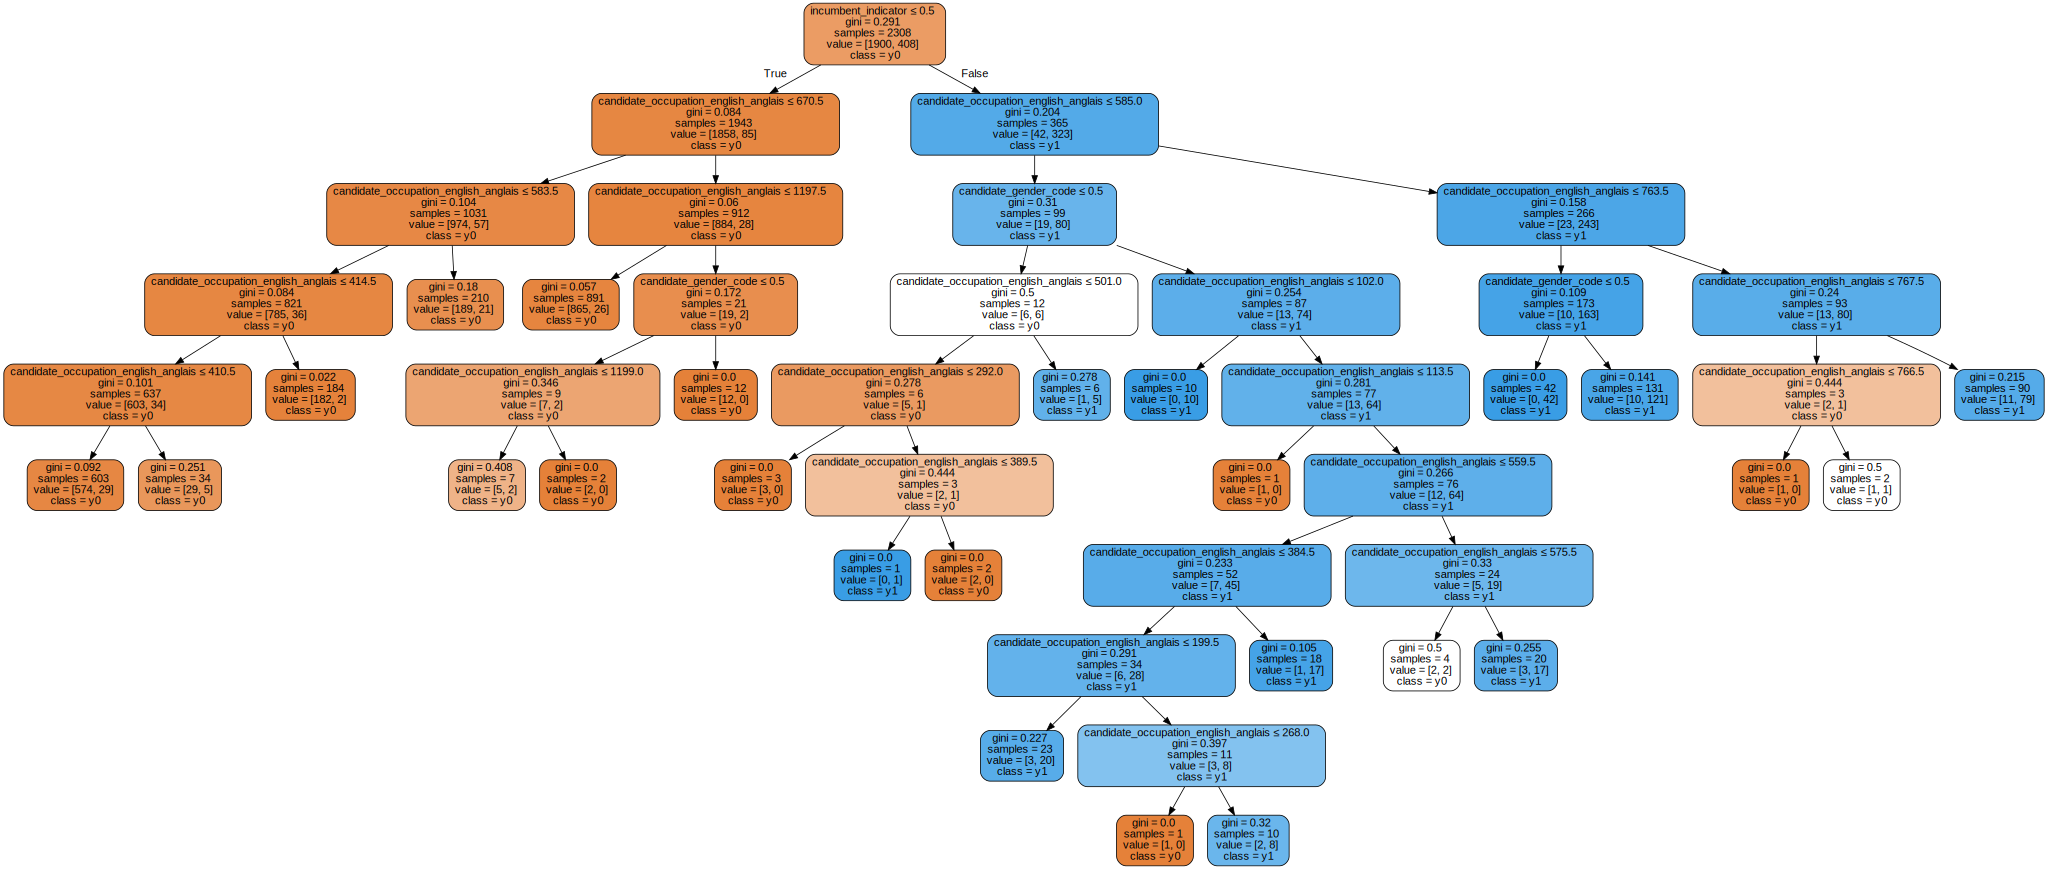

In [127]:
dot_data = tree.export_graphviz(election_classifier, out_file = None, 
                                filled = True, rounded = True,
                                special_characters = True, feature_names = columns, class_names = True)
graph = graphviz.Source(dot_data)
graph

Appears to be overfitting. Candidate occupations are of nominal type, not ordinal. Leafs should not be of value "<=" when looking at occupations.

Try to reduce down to 10 most popular occupations and use one-hot encoding?

In [128]:
clean_data

,election_id,event_number,electoral_district_number_numéro_de_circonscription,ballot_sequence_number,candidate_candidat,candidate_first_name_prénom_du_candidat,candidate_middle_name_second_prénom_du_candidat,candidate_family_name_nom_de_famille_du_candidat,candidate_gender_code,candidate_occupation_english_anglais,profession_du_candidat_français_french,incumbent_indicator,elected_indicator,candidate_residence_résidence_du_candidat,candidate_province_english_anglais,province_du_candidat_français_french,party_abbreviation_english_anglais,abréviation_de_parti_français_french
0,GE.36.1997,3600,ED10-001,1,Randy Dawe,Randy,Randy,Dawe,1,Businessperson,Personne d'affaires,0,0,Clarke's Beach,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
1,GE.36.1997,3600,ED10-001,2,Fraser March,Fraser,Fraser,March,1,Labour Relations Consultant,Consultant en relations de travail,0,0,Blaketown,Newfoundland and Labrador,Terre-Neuve-et-Labrador,NDP,NPD
2,GE.36.1997,3600,ED10-001,3,Fred J. Mifflin,Fred,Fred,Mifflin,1,Politician,Politicien,1,1,Ottawa,Ontario,Ontario,Liberal,Libéral
3,GE.36.1997,3600,ED10-001,4,L. Christopher Randell,L.,L.,Randell,1,Medical Doctor,Médecin,0,0,Bonavista,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Nil,Nil
4,GE.36.1997,3600,ED10-002,1,Bill Matthews,Bill,Bill,Matthews,1,Teacher,Enseignant,0,1,Mount Pearl,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,GE.37.2000,3700,ED61-002,4,Fred Turner,Fred,Fred,Turner,1,Businessman,Homme d'affaires,0,0,Yellowknife,Northwest Territories,Territoires du Nord-Ouest,Canadian Alliance,Alliance Canadienne
3476,GE.37.2000,3700,ED62-001,1,Palluq Susan Enuaraq,Palluq,Palluq,Enuaraq,0,Assistant Director Community Justice,Directrice adjointe de la justice communautaire,0,0,Iqaluit,Nunavut,Nunavut,NDP,NPD
3477,GE.37.2000,3700,ED62-001,2,Brian Robert Jones,Brian,Brian,Jones,1,Informatics Technician,Technicien en informatique,0,0,Cambridge Bay,Nunavut,Nunavut,Green,Vert
3478,GE.37.2000,3700,ED62-001,3,Nancy Karetak-Lindell,Nancy,Nancy,Karetak-Lindell,0,Parliamentarian,Parlementaire,1,1,Arviat,Nunavut,Nunavut,Liberal,Libéral


In [129]:
occ = build_bag_of_words('candidate_occupation_english_anglais', can_data_win)
type(occ)

dict

In [130]:
#select 10 most common

sorted_occ = sorted(occ, key = occ.get, reverse = True)[:10]
sorted_occ

['Parliamentarian',
 'Lawyer',
 'Politician',
 'Businessman',
 'Farmer',
 'Member of Parliament',
 'Teacher',
 'Administrator',
 'Professor',
 'Chartered Accountant']

In [131]:
top_occ_data = clean_data.copy(deep = True)

In [132]:
top_occ_data

,election_id,event_number,electoral_district_number_numéro_de_circonscription,ballot_sequence_number,candidate_candidat,candidate_first_name_prénom_du_candidat,candidate_middle_name_second_prénom_du_candidat,candidate_family_name_nom_de_famille_du_candidat,candidate_gender_code,candidate_occupation_english_anglais,profession_du_candidat_français_french,incumbent_indicator,elected_indicator,candidate_residence_résidence_du_candidat,candidate_province_english_anglais,province_du_candidat_français_french,party_abbreviation_english_anglais,abréviation_de_parti_français_french
0,GE.36.1997,3600,ED10-001,1,Randy Dawe,Randy,Randy,Dawe,1,Businessperson,Personne d'affaires,0,0,Clarke's Beach,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
1,GE.36.1997,3600,ED10-001,2,Fraser March,Fraser,Fraser,March,1,Labour Relations Consultant,Consultant en relations de travail,0,0,Blaketown,Newfoundland and Labrador,Terre-Neuve-et-Labrador,NDP,NPD
2,GE.36.1997,3600,ED10-001,3,Fred J. Mifflin,Fred,Fred,Mifflin,1,Politician,Politicien,1,1,Ottawa,Ontario,Ontario,Liberal,Libéral
3,GE.36.1997,3600,ED10-001,4,L. Christopher Randell,L.,L.,Randell,1,Medical Doctor,Médecin,0,0,Bonavista,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Nil,Nil
4,GE.36.1997,3600,ED10-002,1,Bill Matthews,Bill,Bill,Matthews,1,Teacher,Enseignant,0,1,Mount Pearl,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,GE.37.2000,3700,ED61-002,4,Fred Turner,Fred,Fred,Turner,1,Businessman,Homme d'affaires,0,0,Yellowknife,Northwest Territories,Territoires du Nord-Ouest,Canadian Alliance,Alliance Canadienne
3476,GE.37.2000,3700,ED62-001,1,Palluq Susan Enuaraq,Palluq,Palluq,Enuaraq,0,Assistant Director Community Justice,Directrice adjointe de la justice communautaire,0,0,Iqaluit,Nunavut,Nunavut,NDP,NPD
3477,GE.37.2000,3700,ED62-001,2,Brian Robert Jones,Brian,Brian,Jones,1,Informatics Technician,Technicien en informatique,0,0,Cambridge Bay,Nunavut,Nunavut,Green,Vert
3478,GE.37.2000,3700,ED62-001,3,Nancy Karetak-Lindell,Nancy,Nancy,Karetak-Lindell,0,Parliamentarian,Parlementaire,1,1,Arviat,Nunavut,Nunavut,Liberal,Libéral


In [133]:
top_occ_data = top_occ_data[top_occ_data['candidate_occupation_english_anglais'].isin(sorted_occ)]

In [134]:
top_occ_data

,election_id,event_number,electoral_district_number_numéro_de_circonscription,ballot_sequence_number,candidate_candidat,candidate_first_name_prénom_du_candidat,candidate_middle_name_second_prénom_du_candidat,candidate_family_name_nom_de_famille_du_candidat,candidate_gender_code,candidate_occupation_english_anglais,profession_du_candidat_français_french,incumbent_indicator,elected_indicator,candidate_residence_résidence_du_candidat,candidate_province_english_anglais,province_du_candidat_français_french,party_abbreviation_english_anglais,abréviation_de_parti_français_french
2,GE.36.1997,3600,ED10-001,3,Fred J. Mifflin,Fred,Fred,Mifflin,1,Politician,Politicien,1,1,Ottawa,Ontario,Ontario,Liberal,Libéral
4,GE.36.1997,3600,ED10-002,1,Bill Matthews,Bill,Bill,Matthews,1,Teacher,Enseignant,0,1,Mount Pearl,Newfoundland and Labrador,Terre-Neuve-et-Labrador,PC,PC
6,GE.36.1997,3600,ED10-002,3,David A. Sullivan,David,David,Sullivan,1,Teacher,Enseignant,0,0,Torbay,Newfoundland and Labrador,Terre-Neuve-et-Labrador,NDP,NPD
7,GE.36.1997,3600,ED10-003,1,George Baker,George,George,Baker,1,Politician,Politicien,1,1,Gander,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Liberal,Libéral
11,GE.36.1997,3600,ED10-004,2,Gerry Byrne,Gerry,Gerry,Byrne,1,Politician,Politicien,1,1,Corner Brook,Newfoundland and Labrador,Terre-Neuve-et-Labrador,Liberal,Libéral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,GE.37.2000,3700,ED60-001,4,Louise Hardy,Louise,Louise,Hardy,0,Parliamentarian,Parlementaire,1,0,Whitehorse,Yukon Territory,Territoire du Yukon,NDP,NPD
3473,GE.37.2000,3700,ED61-002,2,Ethel Blondin-Andrew,Ethel,Ethel,Blondin-Andrew,0,Politician,Politicienne,1,1,Yellowknife,Northwest Territories,Territoires du Nord-Ouest,Liberal,Libéral
3474,GE.37.2000,3700,ED61-002,3,Bruce McLaughlin,Bruce,Bruce,McLaughlin,1,Businessman,Homme d'affaires,0,0,Yellowknife,Northwest Territories,Territoires du Nord-Ouest,PC,PC
3475,GE.37.2000,3700,ED61-002,4,Fred Turner,Fred,Fred,Turner,1,Businessman,Homme d'affaires,0,0,Yellowknife,Northwest Territories,Territoires du Nord-Ouest,Canadian Alliance,Alliance Canadienne


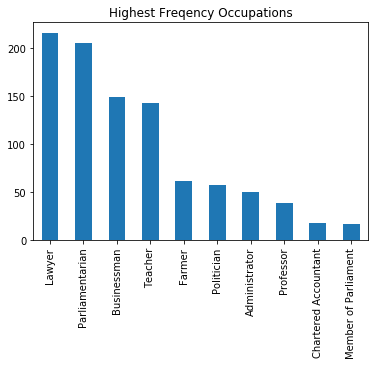

In [135]:
top_occ_data['candidate_occupation_english_anglais'].value_counts().plot(kind = 'bar', title = 'Highest Freqency Occupations')

## Re-complete one-hot encoding

In [136]:
#occupation one-hot encoding using get_dummies

one_hot_top_occ = pd.concat([top_occ_data, pd.get_dummies(top_occ_data['candidate_occupation_english_anglais'], 
                                      prefix='candidate_occupation_english_anglais', dummy_na = False)], axis=1)

one_hot_top_occ

,election_id,event_number,electoral_district_number_numéro_de_circonscription,ballot_sequence_number,candidate_candidat,candidate_first_name_prénom_du_candidat,candidate_middle_name_second_prénom_du_candidat,candidate_family_name_nom_de_famille_du_candidat,candidate_gender_code,candidate_occupation_english_anglais,...,candidate_occupation_english_anglais_Administrator,candidate_occupation_english_anglais_Businessman,candidate_occupation_english_anglais_Chartered Accountant,candidate_occupation_english_anglais_Farmer,candidate_occupation_english_anglais_Lawyer,candidate_occupation_english_anglais_Member of Parliament,candidate_occupation_english_anglais_Parliamentarian,candidate_occupation_english_anglais_Politician,candidate_occupation_english_anglais_Professor,candidate_occupation_english_anglais_Teacher
2,GE.36.1997,3600,ED10-001,3,Fred J. Mifflin,Fred,Fred,Mifflin,1,Politician,...,0,0,0,0,0,0,0,1,0,0
4,GE.36.1997,3600,ED10-002,1,Bill Matthews,Bill,Bill,Matthews,1,Teacher,...,0,0,0,0,0,0,0,0,0,1
6,GE.36.1997,3600,ED10-002,3,David A. Sullivan,David,David,Sullivan,1,Teacher,...,0,0,0,0,0,0,0,0,0,1
7,GE.36.1997,3600,ED10-003,1,George Baker,George,George,Baker,1,Politician,...,0,0,0,0,0,0,0,1,0,0
11,GE.36.1997,3600,ED10-004,2,Gerry Byrne,Gerry,Gerry,Byrne,1,Politician,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,GE.37.2000,3700,ED60-001,4,Louise Hardy,Louise,Louise,Hardy,0,Parliamentarian,...,0,0,0,0,0,0,1,0,0,0
3473,GE.37.2000,3700,ED61-002,2,Ethel Blondin-Andrew,Ethel,Ethel,Blondin-Andrew,0,Politician,...,0,0,0,0,0,0,0,1,0,0
3474,GE.37.2000,3700,ED61-002,3,Bruce McLaughlin,Bruce,Bruce,McLaughlin,1,Businessman,...,0,1,0,0,0,0,0,0,0,0
3475,GE.37.2000,3700,ED61-002,4,Fred Turner,Fred,Fred,Turner,1,Businessman,...,0,1,0,0,0,0,0,0,0,0


Feature selection

In [137]:
#select target

y_one_hot = one_hot_top_occ[['elected_indicator']].copy()

In [138]:
#select features

features = ['candidate_gender_code', 'incumbent_indicator'] + [col for col in one_hot_top_occ if col.startswith('candidate_occupation_english_anglais_')]

features


['candidate_gender_code',
 'incumbent_indicator',
 'candidate_occupation_english_anglais_Administrator',
 'candidate_occupation_english_anglais_Businessman',
 'candidate_occupation_english_anglais_Chartered Accountant',
 'candidate_occupation_english_anglais_Farmer',
 'candidate_occupation_english_anglais_Lawyer',
 'candidate_occupation_english_anglais_Member of Parliament',
 'candidate_occupation_english_anglais_Parliamentarian',
 'candidate_occupation_english_anglais_Politician',
 'candidate_occupation_english_anglais_Professor',
 'candidate_occupation_english_anglais_Teacher']

In [139]:
X_one_hot = one_hot_top_occ[features].copy(deep = True)
X


,candidate_gender_code,candidate_occupation_english_anglais,incumbent_indicator
0,1,138,0
1,1,573,0
2,1,790,1
3,1,670,0
4,1,1096,0
...,...,...,...
3475,1,131,0
3476,0,70,0
3477,1,537,0
3478,0,747,1


In [140]:
X_one_hot.columns

Index(['candidate_gender_code', 'incumbent_indicator',
       'candidate_occupation_english_anglais_Administrator',
       'candidate_occupation_english_anglais_Businessman',
       'candidate_occupation_english_anglais_Chartered Accountant',
       'candidate_occupation_english_anglais_Farmer',
       'candidate_occupation_english_anglais_Lawyer',
       'candidate_occupation_english_anglais_Member of Parliament',
       'candidate_occupation_english_anglais_Parliamentarian',
       'candidate_occupation_english_anglais_Politician',
       'candidate_occupation_english_anglais_Professor',
       'candidate_occupation_english_anglais_Teacher'],
      dtype='object')

In [141]:
y_one_hot.columns

Index(['elected_indicator'], dtype='object')

In [142]:
X_one_hot_train, X_one_hot_test, y_one_hot_train, y_one_hot_test = train_test_split (X_one_hot, y_one_hot, test_size = 0.33, random_state = 324)

Fit on Train Set

In [143]:
election_classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
election_classifier.fit(X_one_hot_train, y_one_hot_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [144]:
type(election_classifier)

sklearn.tree.tree.DecisionTreeClassifier

Prediction on Test Set

In [145]:
predictions_one_hot = election_classifier.predict(X_one_hot_test)

In [146]:
predictions_one_hot[:10]

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [147]:
y_one_hot_test['elected_indicator'][:10]

2074    1
3232    0
327     0
3416    0
2634    1
2863    1
651     1
3060    0
3142    1
2205    0
Name: elected_indicator, dtype: int32

Measuring accuracy of the Classifier

In [148]:
accuracy_score(y_true = y_one_hot_test, y_pred = predictions_one_hot)

0.926984126984127

In [149]:
columns = list(X_one_hot_train.columns)

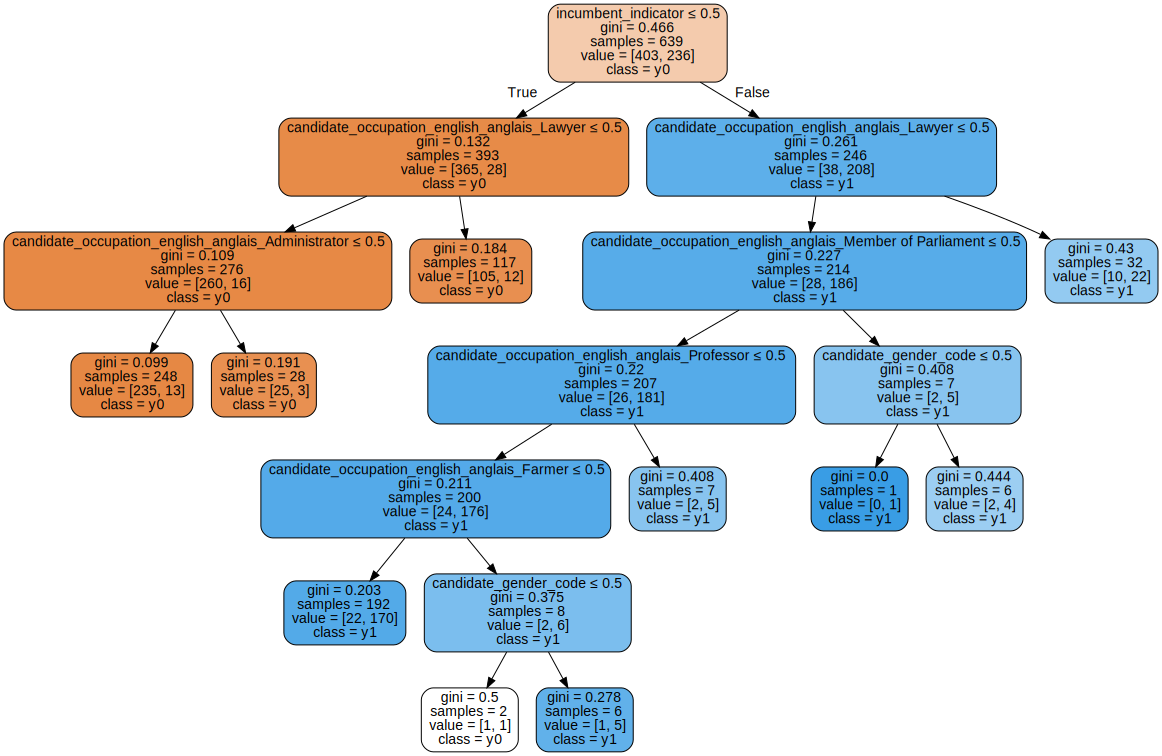

In [150]:
dot_data = tree.export_graphviz(election_classifier, out_file = None, 
                                filled = True, rounded = True,
                                special_characters = True, feature_names = columns, class_names = True)
graph = graphviz.Source(dot_data)
graph

In [151]:
feature_importance = (dict(zip(X_one_hot_train.columns, election_classifier.feature_importances_)))

([<matplotlib.axis.YTick at 0x1788eb984a8>,
 <a list of 12 Text yticklabel objects>)

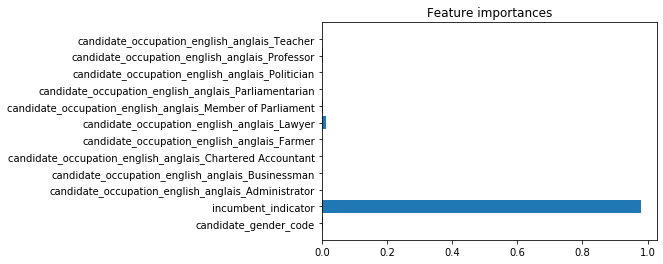

In [152]:
#plot the feature importance
plt.figure()
plt.title('Feature importances')
plt.barh(range(len(feature_importance)), list(feature_importance.values()), align = 'center')
plt.yticks(range(len(feature_importance)), list(feature_importance.keys()))